In [183]:
import pandas as pd
# pd.set_option('max_colwidth', 20)

import numpy as np
import seaborn as sns
from matplotlib import pyplot

import inflection

import warnings
warnings.filterwarnings('ignore')

## Loadind Data

In [40]:
path = "./Data/"
df = pd.read_csv(path + 'train.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,...,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


## 1.0 Descrição dos Dados

In [66]:
df1 = df.copy()

In [45]:
df1.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
       'Store size', 'Store distance', 'InStore wifi',
       'Open/Close time convenient', 'Easy of online shopping',
       'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
       'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
       'Purchase service', 'Store Service', 'Cleanliness',
       'Carrier delay in minutes', 'Delivery delay in minutes',
       'Satisfaction'],
      dtype='object')

### 1.1 Rename Columns

In [67]:
cols_old = df1.columns

snakecase = lambda x: x.replace(' ', '_').replace('/', '_').replace('-', '_')

cols_new = list( map( snakecase, cols_old ) )

df1.columns = cols_new
df1.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Purchase',
       'Store_size', 'Store_distance', 'InStore_wifi',
       'Open_Close_time_convenient', 'Easy_of_online_shopping',
       'Store_location', 'Toilet_cleaning', 'Dressing_room', 'Waiting_room',
       'Kids_entertainment', 'Seller_service', 'Showroom_', 'Self_Store',
       'Purchase_service', 'Store_Service', 'Cleanliness',
       'Carrier_delay_in_minutes', 'Delivery_delay_in_minutes',
       'Satisfaction'],
      dtype='object')

### 1.2 Data Dimensions

In [47]:
df1.shape

(103904, 24)

### 1.3 Data Types

In [48]:
df1.dtypes

id                              int64
Gender                         object
Customer_Type                  object
Age                             int64
Type_of_Purchase               object
Store_size                     object
Store_distance                  int64
InStore_wifi                    int64
Open_Close_time_convenient      int64
Easy_of_online_shopping         int64
Store_location                  int64
Toilet_cleaning                 int64
Dressing_room                   int64
Waiting_room                    int64
Kids_entertainment              int64
Seller_service                  int64
Showroom_                       int64
Self_Store                      int64
Purchase_service                int64
Store_Service                   int64
Cleanliness                     int64
Carrier_delay_in_minutes        int64
Delivery_delay_in_minutes     float64
Satisfaction                   object
dtype: object

### 1.4 Check NA

In [49]:
(df.isna().sum() / df.shape[0]) * 100 

id                            0.000000
Gender                        0.000000
Customer Type                 0.000000
Age                           0.000000
Type of Purchase              0.000000
Store size                    0.000000
Store distance                0.000000
InStore wifi                  0.000000
Open/Close time convenient    0.000000
Easy of online shopping       0.000000
Store location                0.000000
Toilet cleaning               0.000000
Dressing room                 0.000000
Waiting room                  0.000000
Kids entertainment            0.000000
Seller service                0.000000
Showroom                      0.000000
Self-Store                    0.000000
Purchase service              0.000000
Store Service                 0.000000
Cleanliness                   0.000000
Carrier delay in minutes      0.000000
Delivery delay in minutes     0.298352
Satisfaction                  0.000000
dtype: float64

### 1.5 Fillout NA

### 1.6 Descriptive Statiscal

In [68]:
# Separando os valores numericos e descritivos

num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### Variaveis Numéricas

In [51]:
num_attributes.head(2)

,id,Age,Store_distance,InStore_wifi,Open_Close_time_convenient,Easy_of_online_shopping,Store_location,Toilet_cleaning,Dressing_room,Waiting_room,Kids_entertainment,Seller_service,Showroom_,Self_Store,Purchase_service,Store_Service,Cleanliness,Carrier_delay_in_minutes,Delivery_delay_in_minutes
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0


#### Variaveis Categoricas

In [52]:
cat_attributes.head(2)

,Gender,Customer_Type,Type_of_Purchase,Store_size,Satisfaction
0,Male,Loyal Customer,Personal,Small,Neutral or Dissatisfaction
1,Male,disloyal Customer,Gift,Large,Neutral or Dissatisfaction


#### 1.6.1 Numerical Attributes

In [69]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,129880.0,129879.0,64924.210502,64856.5,37463.631970,0.002864,-1.198440
1,Age,7.0,85.0,78.0,39.379706,40.0,15.114891,-0.004516,-0.719568
2,Store_distance,31.0,4983.0,4952.0,1189.448375,843.0,997.142482,1.109466,0.268535
3,InStore_wifi,0.0,5.0,5.0,2.729683,3.0,1.327823,0.040408,-0.846170
4,Open_Close_time_convenient,0.0,5.0,5.0,3.060296,3.0,1.525068,-0.334399,-1.037767
5,Easy_of_online_shopping,0.0,5.0,5.0,2.756901,3.0,1.398923,-0.018294,-0.910346
6,Store_location,0.0,5.0,5.0,2.976883,3.0,1.277615,-0.058889,-1.030283
7,Toilet_cleaning,0.0,5.0,5.0,3.202129,3.0,1.329526,-0.151279,-1.145453
8,Dressing_room,0.0,5.0,5.0,3.250375,3.0,1.349502,-0.453852,-0.702006
9,Waiting_room,0.0,5.0,5.0,3.439396,4.0,1.319081,-0.482775,-0.925702


<Axes: xlabel='Carrier_delay_in_minutes', ylabel='Density'>

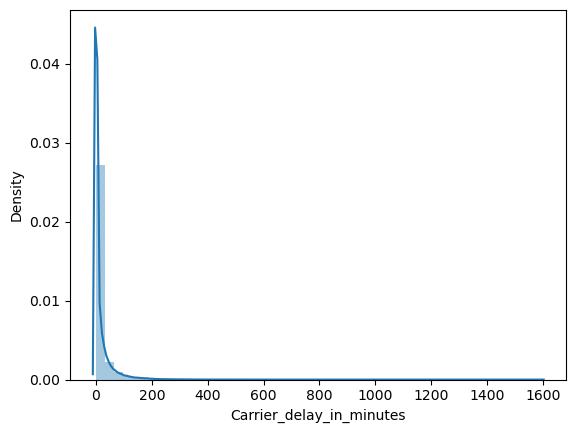

In [55]:
sns.distplot( df1['Carrier_delay_in_minutes'], kde=True )

<Axes: xlabel='Delivery_delay_in_minutes', ylabel='Density'>

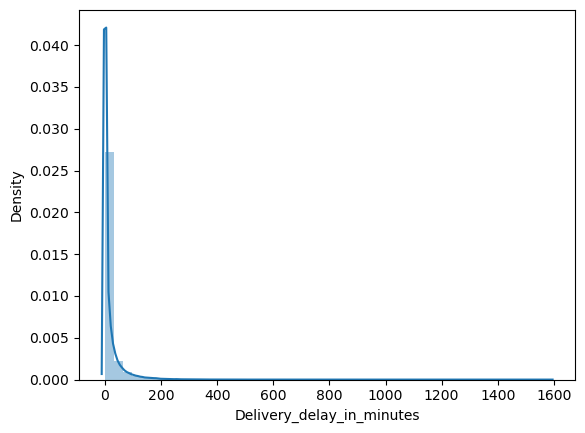

In [56]:
sns.distplot( df1['Delivery_delay_in_minutes'], kde=True )

##### Tentando Tratar Outliers

In [259]:
(df1
 .groupby('Carrier_delay_in_minutes')
 .agg(quantidade_clientes = pd.NamedAgg('id', 'count'))
 .query('quantidade_clientes == 1')
)

,quantidade_clientes
Carrier_delay_in_minutes,
257,1
268,1
270,1
278,1
283,1
...,...
933,1
978,1
1017,1


## 2.0 Mapa de Hipóteses

- Clientes que adquirem compras pessoais deveriam estar satisfeitos.

===============================================================================

- Clientes que tiverem entregas com tempo baixo no atraso da entrega, deveriam estar satisfeitos.

- Clientes que classificam o serviço de compras acima de 4 deveriam estar satisfeitos.

===========================================================================

Wifi, acesso_loja (Store_Location), Toilet_cleaning, Purchase_service, Store_Service, Cleanliness, Waiting room 

In [126]:
df2 = df1.copy()

In [127]:
df2.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Purchase',
       'Store_size', 'Store_distance', 'InStore_wifi',
       'Open_Close_time_convenient', 'Easy_of_online_shopping',
       'Store_location', 'Toilet_cleaning', 'Dressing_room', 'Waiting_room',
       'Kids_entertainment', 'Seller_service', 'Showroom_', 'Self_Store',
       'Purchase_service', 'Store_Service', 'Cleanliness',
       'Carrier_delay_in_minutes', 'Delivery_delay_in_minutes', 'Satisfaction',
       'Satisfaction_Dummy'],
      dtype='object')

### 2.1 - Clientes que classificam o espaço kids acima de 4 deveriam estar satisfeitos.

<Axes: xlabel='Kids_entertainment', ylabel='id'>

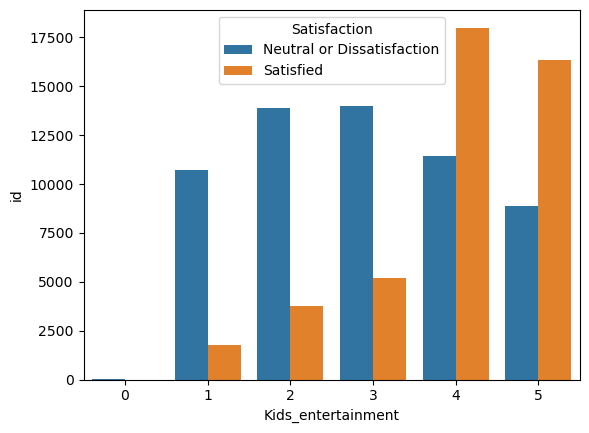

In [170]:
espaco_kids = (df2[['id', 'Kids_entertainment', 'Satisfaction']]
               .groupby(['Kids_entertainment', 'Satisfaction'])
               .count()
               )

sns.barplot(x= 'Kids_entertainment', y='id', data=espaco_kids.reset_index(), hue='Satisfaction')

### 2.2 - Clientes que classificam a facilidade da compra online acima de 4 deveriam estar satisfeitos.

- Aparentemente a facilidade de compra online é diretamente proporcional a satisfação dos clientes

<Axes: xlabel='Easy_of_online_shopping', ylabel='quantidade_clientes'>

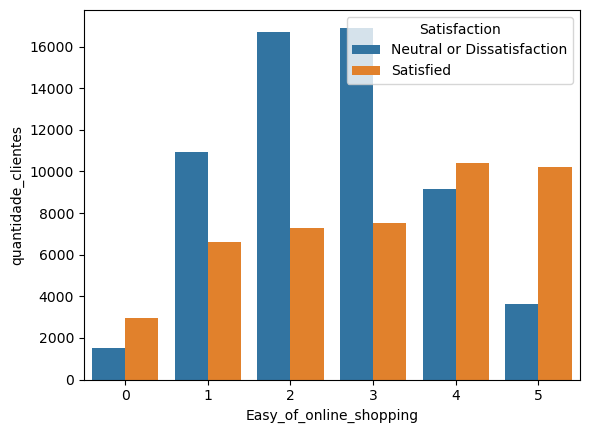

In [165]:
compra_online = df2.groupby(['Easy_of_online_shopping', 'Satisfaction']).agg(
                    quantidade_clientes = pd.NamedAgg('id', 'count')
                    )#.reset_index()

compra_online['percentage_clients'] = (compra_online['quantidade_clientes'] / df2.shape[0]) * 100 

sns.barplot(x= 'Easy_of_online_shopping', y='quantidade_clientes', data=compra_online.reset_index(), hue='Satisfaction')

### 2.3 Clientes que estão mais próximos da loja deveriam estar satisfeitos

- Quanto mais próximo os clientes estiverem da loja mais clientes terão

<Axes: xlabel='Distancia_Escala', ylabel='quantidade_clientes'>

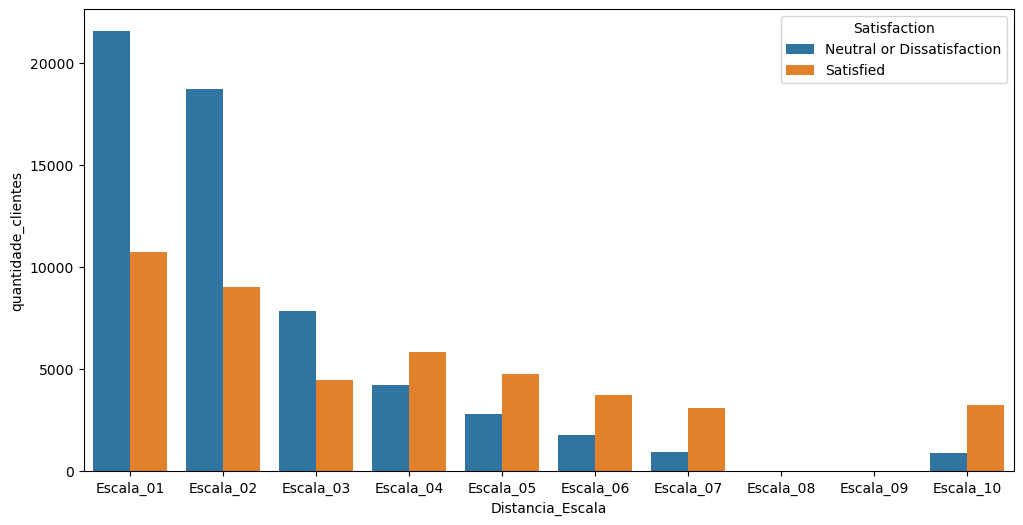

In [186]:
distancia_loja = df2[['id', 'Store_distance', 'Satisfaction']]
distancia_loja['Distancia_Escala'] = distancia_loja['Store_distance'].apply(lambda x: "Escala_01" if x <= 500 else 
                                                                                      "Escala_02" if (x > 500) & (x <= 1000) else 
                                                                                      "Escala_03" if (x > 1000) & (x <= 1500) else 
                                                                                      "Escala_04" if (x > 1500) & (x <= 2000) else 
                                                                                      "Escala_05" if (x > 2000) & (x <= 2500) else 
                                                                                      "Escala_06" if (x > 2500) & (x <= 3000) else 
                                                                                      "Escala_07" if (x > 3000) & (x <= 3500) else 
                                                                                      "Escala_08" if (x > 4000) & (x <= 4500) else 
                                                                                      "Escala_09" if (x > 4500) & (x <= 5000) else 
                                                                                      "Escala_10")

distancia_loja = distancia_loja.groupby(['Distancia_Escala', 'Satisfaction']).agg(
                                                                                quantidade_clientes = pd.NamedAgg('id', 'count')
                                                                                )

fig, ax = pyplot.subplots(figsize=(12, 6))
sns.barplot(x= 'Distancia_Escala', y='quantidade_clientes', data=distancia_loja.reset_index(), hue='Satisfaction', ax=ax)

In [258]:
distancia_loja

quantidade_clientes
Distancia_Escala Satisfaction                                   
Escala_01        Neutral or Dissatisfaction                21555
                 Satisfied                                 10766
Escala_02        Neutral or Dissatisfaction                18718
                 Satisfied                                  9026
Escala_03        Neutral or Dissatisfaction                 7876
                 Satisfied                                  4492
Escala_04        Neutral or Dissatisfaction                 4222
                 Satisfied                                  5836
Escala_05        Neutral or Dissatisfaction                 2832
                 Satisfied                                  4752
Escala_06        Neutral or Dissatisfaction                 1809
                 Satisfied                                  3755
Escala_07        Neutral or Dissatisfaction                  929
                 Satisfied                                  3130
Escala_08        Neutral or Dissatisfaction                    7
                 Satisfied                                    11
Escala_09        Neutral or Dissatisfaction                   19
                 Satisfied                                    21
Escala_10        Neutral or Dissatisfaction                  912
                 Satisfied                                  3236

### 2.4 Clientes avaliaram bem a Dressing_Room estão mais satisfeitos

<Axes: xlabel='Dressing_room', ylabel='quantidade_clientes'>

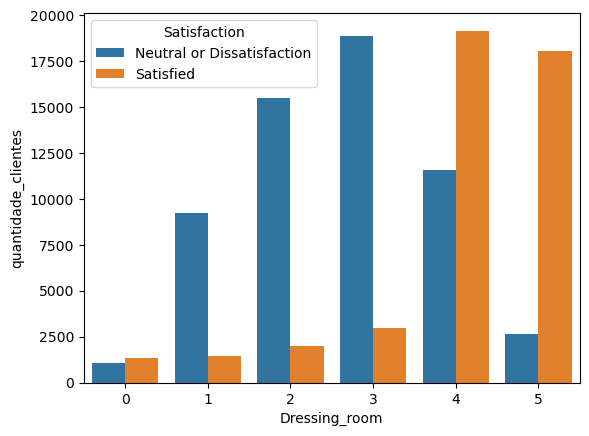

In [212]:
vestuario = (df2[['id', 'Dressing_room', 'Satisfaction']]
             .groupby(['Dressing_room', 'Satisfaction']).agg(
                 quantidade_clientes = pd.NamedAgg('id', 'count')
                 )
             .reset_index()
             )

sns.barplot(x='Dressing_room', y='quantidade_clientes', data=vestuario, hue='Satisfaction')

### 2.5 Clientes que são do tipo Loyal Customer deveriam estar satisfeitos

<Axes: xlabel='Customer_Type', ylabel='percentage_clients'>

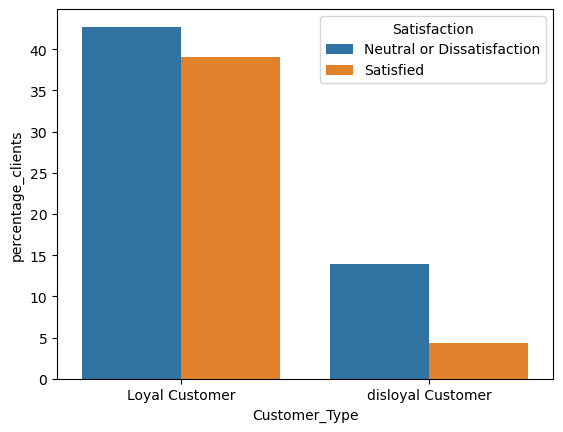

In [210]:
df_plot = df2[['id', 'Satisfaction', 'Customer_Type']].groupby(['Customer_Type', 'Satisfaction']).agg(
                                                      quantidade_clientes = pd.NamedAgg('id', 'count')
                                                      ).reset_index()

df_plot['percentage_clients'] = (df_plot['quantidade_clientes'] / df2.shape[0]) * 100 

sns.barplot(x='Customer_Type', y='percentage_clients', data=df_plot, hue='Satisfaction')

### 2.6 Clientes que classificam a o tempo de abertura e fechamento da loja acima de 4 deveriam estar satisfeitos

- Falso

<Axes: xlabel='Open_Close_time_convenient', ylabel='id'>

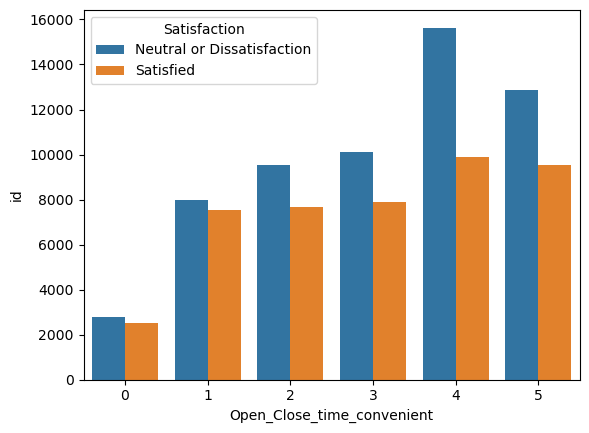

In [215]:
abertura_loja = (df2[['id', 'Open_Close_time_convenient', 'Satisfaction']]
                 .groupby(['Open_Close_time_convenient', 'Satisfaction'])
                 .count()
               )

sns.barplot(x= 'Open_Close_time_convenient', y='id', data=abertura_loja.reset_index(), hue='Satisfaction')

<Axes: xlabel='Grupos', ylabel='Percentage_clients'>

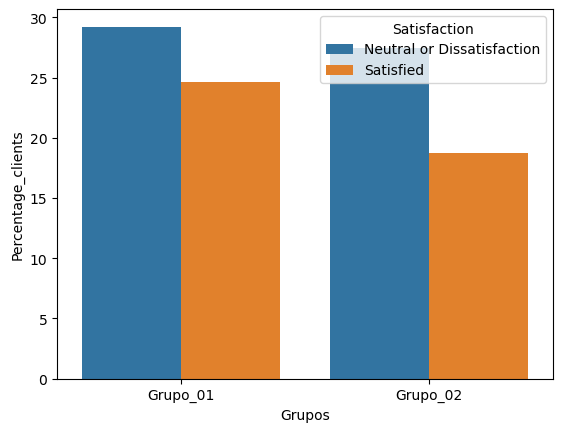

In [232]:
df_teste = df2[['id', 'Open_Close_time_convenient', 'Satisfaction']]

df_teste['Grupos'] = df_teste['Open_Close_time_convenient'].apply(lambda x: 'Grupo_01' if x in (0, 1, 2, 3) else 'Grupo_02')

abertura_loja = (df_teste[['id', 'Grupos', 'Satisfaction']]
                 .groupby(['Grupos', 'Satisfaction'])
                 .count()
                 .reset_index()
               )

abertura_loja['Percentage_clients'] = (abertura_loja['id'] / df2.shape[0]) * 100 

sns.barplot(x= 'Grupos', y='Percentage_clients', data=abertura_loja.reset_index(), hue='Satisfaction')

### 2.7 Clientes que classificam a limpeza da loja acima de 4 deveriam estar satisfeitos.

<Axes: xlabel='Cleanliness', ylabel='id'>

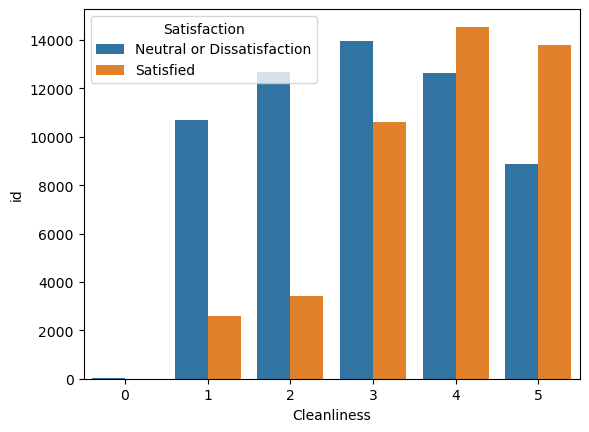

In [233]:
limpeza_loja = (df2[['id', 'Cleanliness', 'Satisfaction']]
               .groupby(['Cleanliness', 'Satisfaction'])
               .count()
               )

sns.barplot(x='Cleanliness', y='id', data=limpeza_loja.reset_index(), hue='Satisfaction')

## 3.0 